In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



In [13]:
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
#Hyperparameters

input_size = 784  # 28x28
hidden_size = 110 
num_classes = 10  # 0-9 digists
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [5]:
#MNIST DATA

train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor())

In [6]:
# Load dataset
train_loader = torch.utils.data.DataLoader(dataset= train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

#[samples(batch), channel(1 grayscale image), image_size] ([n°labels])


torch.Size([100, 1, 28, 28]) torch.Size([100])


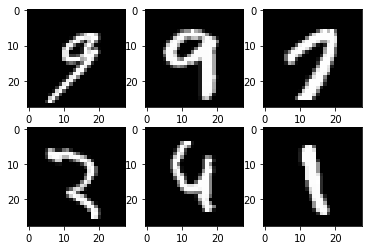

In [7]:
#data visualization

for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [20]:
# Neural Network

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    # Multiclassification problem dont need activacion function at the end,
    # because we use CrossEntropy loss, the loss applies the softmax function automatically.
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [21]:
#Loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [22]:
#Training Loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1 , 28, 28
    # 100, 784
    #reshape tensor
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # Forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss= {loss.item():.4f}')
  

epoch 1/10, step 100/600, loss= 0.4591
epoch 1/10, step 200/600, loss= 0.3148
epoch 1/10, step 300/600, loss= 0.3902
epoch 1/10, step 400/600, loss= 0.3187
epoch 1/10, step 500/600, loss= 0.3034
epoch 1/10, step 600/600, loss= 0.3375
epoch 2/10, step 100/600, loss= 0.0836
epoch 2/10, step 200/600, loss= 0.2105
epoch 2/10, step 300/600, loss= 0.1470
epoch 2/10, step 400/600, loss= 0.1022
epoch 2/10, step 500/600, loss= 0.1129
epoch 2/10, step 600/600, loss= 0.1156
epoch 3/10, step 100/600, loss= 0.1457
epoch 3/10, step 200/600, loss= 0.1183
epoch 3/10, step 300/600, loss= 0.2356
epoch 3/10, step 400/600, loss= 0.2030
epoch 3/10, step 500/600, loss= 0.0693
epoch 3/10, step 600/600, loss= 0.0938
epoch 4/10, step 100/600, loss= 0.0857
epoch 4/10, step 200/600, loss= 0.0807
epoch 4/10, step 300/600, loss= 0.1177
epoch 4/10, step 400/600, loss= 0.0627
epoch 4/10, step 500/600, loss= 0.1904
epoch 4/10, step 600/600, loss= 0.0519
epoch 5/10, step 100/600, loss= 0.0699
epoch 5/10, step 200/600,

In [24]:
# Test

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # return the value and index (index = predictions)
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  accuracy = 100.0 * n_correct / n_samples
  print(f'accuracy = {accuracy}')

accuracy = 97.68
